# Investigating the differences between different phoenix models.


In [13]:
from spectrum_overload import Spectrum

import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import numpy as np
from astropy.io import fits

from astro_scripts.plot_fits import get_wavelength, ccf_astro, vac2air
from loading_phoenix import load_phoenix_aces, load_Allard_Phoenix, align2model

%matplotlib inline

As we are mostly interested in the NIR I will limit the synthetic models to 1000-3000nm. This removes many large differences at the blue optical end.

In [ ]:
limits = [2000, 3000]

# Synthethic Artucus
Using the models with Teff 4300, 1.5 logg, -0.0 [Fe/H]

Daniel used -0.5 Fe/H

load Allard_PHOENIX reutrns wavelenght in nanometers.
Using vac2air to convert to air, (which needs angstroms). Hence *10 / 10 fudge

In [ ]:
w_settl, f_settl, bb_settl = load_Allard_Phoenix("data/lte043.0-2.5-0.0a+0.0.BT-Settl.spec.7")
settl_spec = Spectrum(xaxis=vac2air(w_settl*10)/10, flux=f_settl) 

w_dusty_spec, f_dusty_spec, bb_dusty_spec = load_Allard_Phoenix("data/lte043-2.5-0.0.BT-Dusty.spec.7")
dusty_spec = Spectrum(xaxis=vac2air(w_dusty_spec*10)/10, flux=f_dusty_spec) 

w_next, f_next, bb_next = load_Allard_Phoenix("data/lte043-2.5-0.0a+0.0.BT-NextGen.7")
next_spec = Spectrum(xaxis=vac2air(w_next*10)/10, flux=f_next) 

w_cond, f_cond, bb_cond = load_Allard_Phoenix("data/lte043-2.5-0.0a+0.0.BT-Cond.7")
cond_spec = Spectrum(xaxis=vac2air(w_cond*10)/10, flux=f_cond) 

w_aces, f_aces = load_phoenix_aces("data/lte04300-2.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
aces_spec = Spectrum(xaxis=vac2air(w_aces*10)/10, flux=f_aces) 


In [ ]:


w_aces, f_aces = load_phoenix_aces("data/lte04300-1.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
aces_spec_15 = Spectrum(xaxis=vac2air(w_aces*10)/10, flux=f_aces) 

(aces_spec_15 - aces_spec).plot()
plt.title("Difference between 1.5 and 2.5 logg for phoenix aces")
plt.show()

In [ ]:
# Full Spectrum
plt.figure(figsize=(15, 10))
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

In [ ]:
# COMPARISON TO PHOENIX ACES
# Full Spectrum Differences
plt.figure(figsize=(15, 15))
ax0 = plt.subplot(411)
(aces_spec - settl_spec).plot(axis=ax0)
plt.title("PHOENIX ACES - BT-Settl")
plt.ylabel("Flux")
ax1  = plt.subplot(412)
(settl_spec - cond_spec).plot(axis=ax1)
plt.title("BT-Settl- BT-Cond")
plt.ylabel("Flux")
ax2 = plt.subplot(413)
(dusty_spec - cond_spec).plot(axis=ax2)
plt.title("BT-Dusty-BT-Cond")
ax3 = plt.subplot(414)
(next_spec - cond_spec).plot(axis=ax3)
plt.title("NextGen - Cond")

plt.suptitle("Synthethic Differences\nArtucus-like\nTeff=4300, logg=2.5, Fe/H= 0.0")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

# Relative
plt.figure(figsize=(15, 15))
ax0 = plt.subplot(411)
((aces_spec - settl_spec)/aces_spec).plot(axis=ax0)
plt.title("PHOENIX ACES - BT-Settl")
plt.ylabel("Flux")
ax1  = plt.subplot(412)
(settl_spec - cond_spec).plot(axis=ax1)
plt.title("BT-Settl- BT-Cond")
plt.ylabel("Flux")
ax2 = plt.subplot(413)
(dusty_spec - cond_spec).plot(axis=ax2)
plt.title("BT-Dusty-BT-Cond")
ax3 = plt.subplot(414)
(next_spec - cond_spec).plot(axis=ax3)
plt.title("NextGen - Cond")

plt.suptitle("Synthethic Differences\nArtucus-like\nTeff=4300, logg=2.5, Fe/H= 0.0")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

In [ ]:
[1000, 3000]

# COMPARISON TO BT-SETTLE models
# Full Spectrum Differences
plt.figure(figsize=(15, 15))
ax0 = plt.subplot(411)
(settl_spec - next_spec).plot(axis=ax0)
plt.title("BT-Settl, BT-NextGen")
plt.ylabel("Flux")

ax1  = plt.subplot(412)
(settl_spec - cond_spec).plot(axis=ax1)
plt.title("BT-Settl- BT-Cond")
plt.ylabel("Flux")

ax2 = plt.subplot(413)
(settl_spec - dusty_spec).plot(axis=ax2)
plt.title("BT-Settl - BT-Dusty")

ax3 = plt.subplot(414)
(cond_spec - dusty_spec).plot(axis=ax3)
plt.title("BT-Cond - BT-Dusty")

ax4 = plt.subplot(414)
(next_spec - cond_spec).plot(axis=ax4)
plt.title("BT-NextGen - Cond")

plt.suptitle("BT-XXX Synthethic Differences\nArtucus-like\nTeff=4300, logg=2.5, Fe/H= 0.0")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()


# Relative
plt.figure(figsize=(15, 15))
ax10 = plt.subplot(411)
((settl_spec - next_spec)/settl_spec).plot(axis=ax10)
plt.title("BT-Settl, BT-NextGen")
plt.ylabel("Flux")

ax11  = plt.subplot(412)
((settl_spec - cond_spec)/settl_spec).plot(axis=ax11)
plt.title("BT-Settl- BT-Cond")
plt.ylabel("Flux")

ax12 = plt.subplot(413)
((settl_spec - dusty_spec)/settl_spec).plot(axis=ax12)
plt.title("BT-Settl - BT-Dusty")

ax13 = plt.subplot(414)
((cond_spec - dusty_spec)/cond_spec).plot(axis=ax13)
plt.title("BT-Cond - BT-Dusty")

ax14 = plt.subplot(414, sharex=ax10)
((next_spec - cond_spec)/next_spec).plot(axis=ax14)
plt.title("BT-NextGen - Cond")

plt.suptitle("BT-XXX Relative Synthethic Differences\nArtucus-like\nTeff=4300, logg=2.5, Fe/H= 0.0")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()

plt.show()


In [ ]:
# ARTUCUS 1000nm
artucus_1 = "/home/jneal/Phd/data/artucus/10097-10155_s-obs.fits"
data, hdr = fits.getdata(artucus_1, header=True)
artucus_1 = Spectrum(xaxis=get_wavelength(hdr)/10, flux=data, header=hdr )
artucus_1 = artucus_1.normalize("linear")

In [ ]:
#limits = [2100, 2200]
limits = [artucus_1.xaxis[0]-2, artucus_1.xaxis[-1]+2]
print(limits)
next_spec.wav_select(*limits)
next_spec = next_spec.normalize("exponential")
dusty_spec.wav_select(*limits)
dusty_spec = dusty_spec.normalize("exponential")
settl_spec.wav_select(*limits)
settl_spec = settl_spec.normalize("exponential")
cond_spec.wav_select(*limits)
cond_spec = cond_spec.normalize("exponential")
aces_spec.wav_select(*limits)
aces_spec = aces_spec.normalize("exponential")


In [8]:
print(np.mean(vac2air(aces_spec.xaxis*10)/10 - aces_spec.xaxis)*3e5)

artucus_1 = align2model(artucus_1, aces_spec)

-83251.579277
[ 93.55454047]


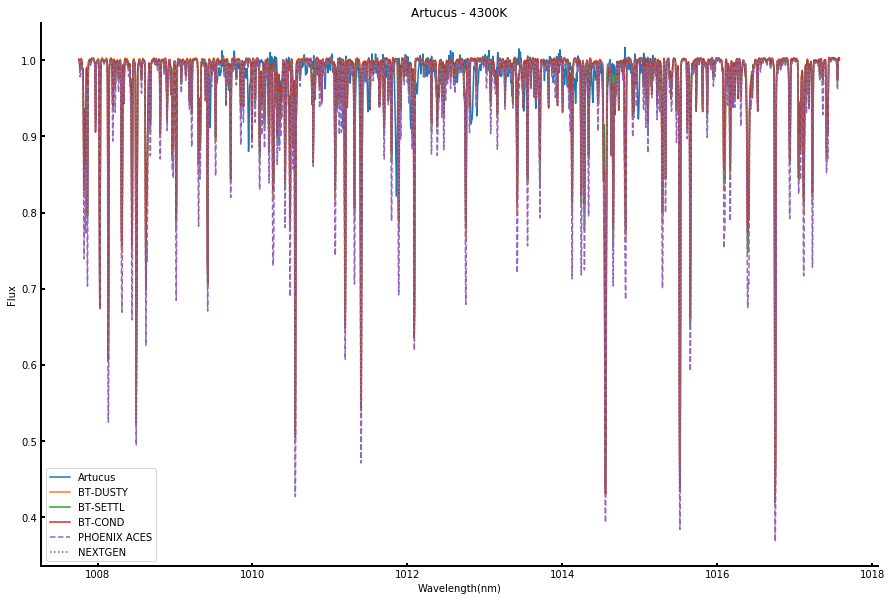

In [9]:
plt.figure(figsize=(15, 10))
artucus_1.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

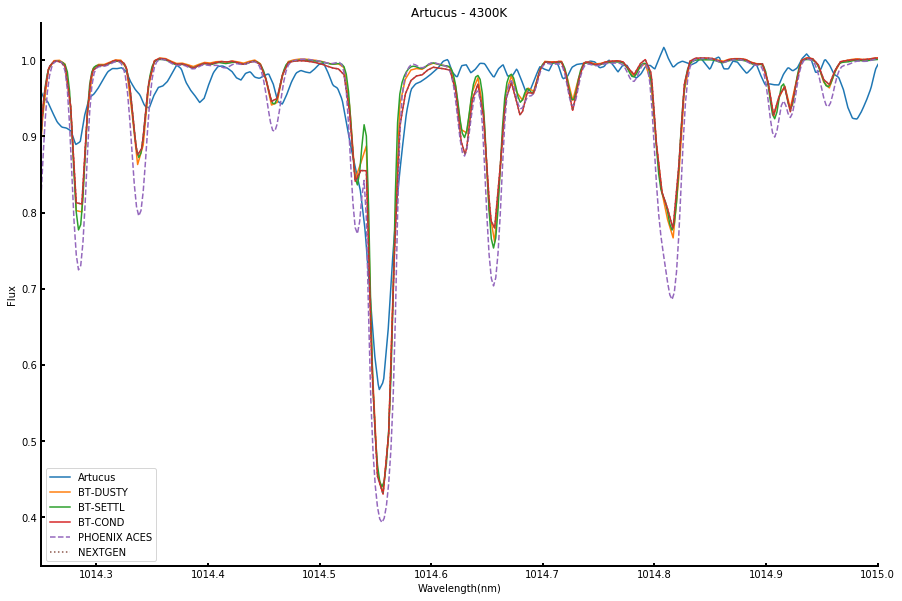

In [10]:
plt.figure(figsize=(15, 10))
artucus_1.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([1014.25, 1015])
plt.legend()
plt.show()

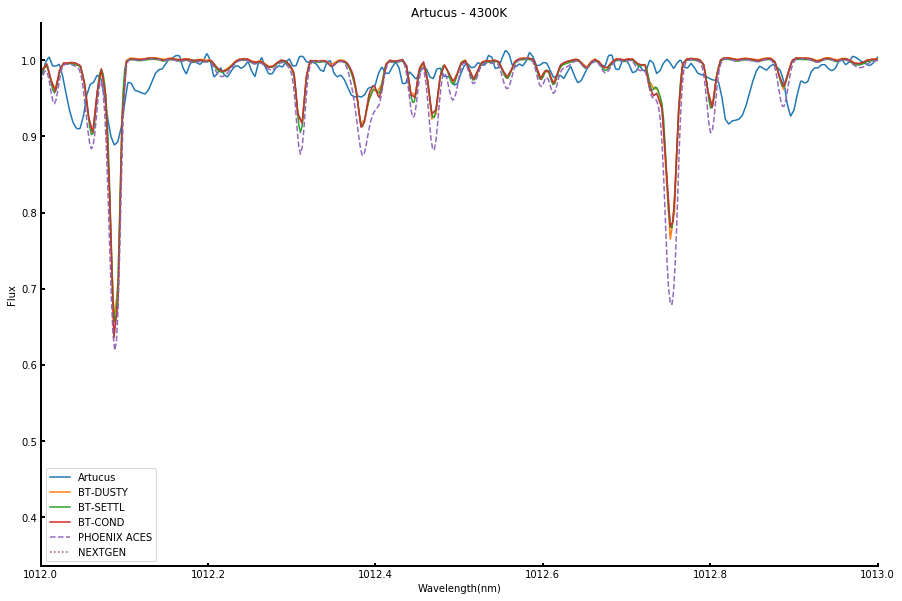

In [11]:
plt.figure(figsize=(15, 10))
artucus_1.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([1012, 1013])
plt.legend()
plt.show()

In [12]:
# Adjust resolution to R=100000
R = 100000
from convolve_spectrum import convolve_spectrum
old_spec = aces_spec.copy()

next_spec = convolve_spectrum(next_spec, chip_limits=[next_spec.xaxis[0], next_spec.xaxis[-1]], R=R, plot=False)
dusty_spec = convolve_spectrum(dusty_spec, chip_limits=[dusty_spec.xaxis[0], dusty_spec.xaxis[-1]], R=R, plot=False)
settl_spec = convolve_spectrum(settl_spec, chip_limits=[settl_spec.xaxis[0], settl_spec.xaxis[-1]], R=R, plot=False)
cond_spec = convolve_spectrum(cond_spec, chip_limits=[cond_spec.xaxis[0], cond_spec.xaxis[-1]], R=R, plot=False)
aces_spec = convolve_spectrum(aces_spec, chip_limits=[aces_spec.xaxis[0], aces_spec.xaxis[-1]], R=R, plot=False)

assert aces_spec != old_spec

100%|██████████| 4913/4913 [00:00<00:00, 33215.05it/s]


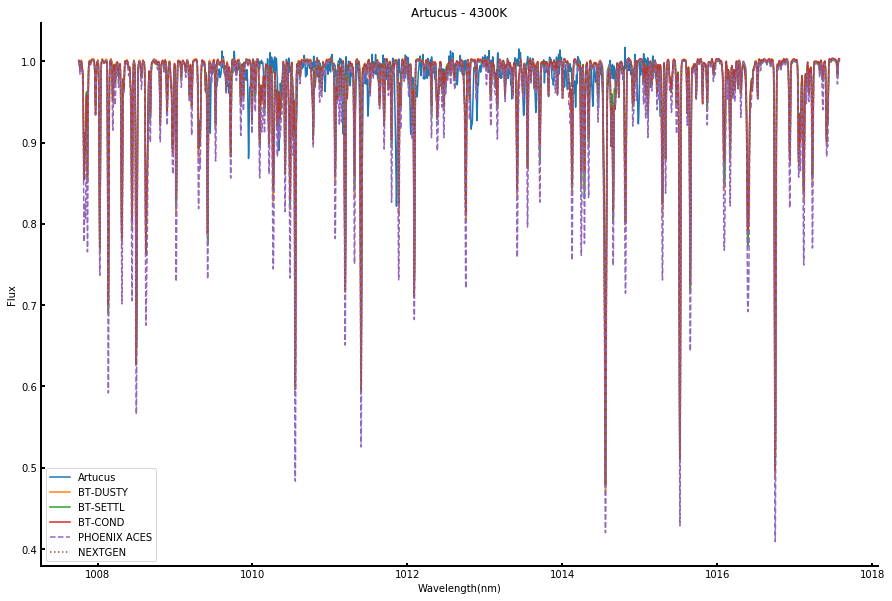

In [13]:
plt.figure(figsize=(15, 10))
artucus_1.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

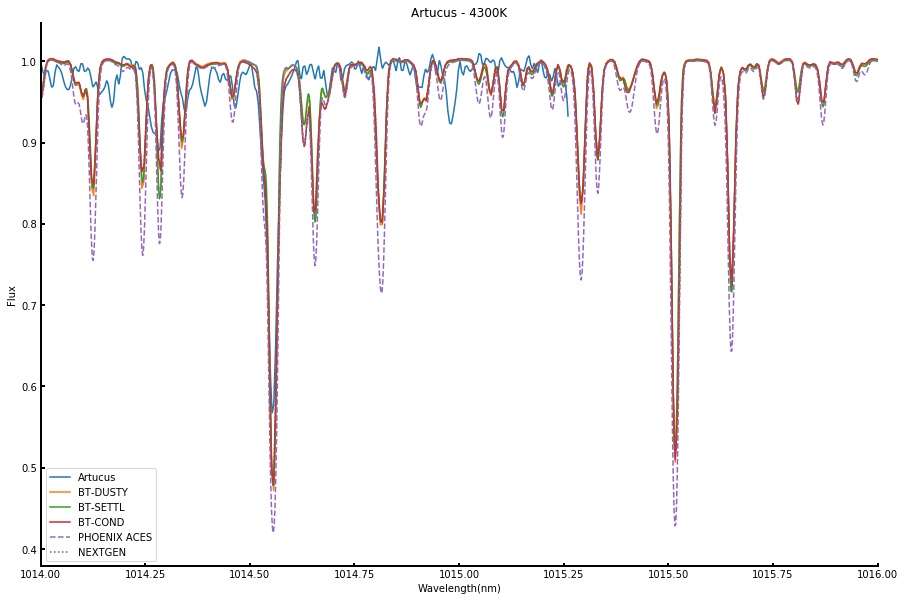

In [14]:
plt.figure(figsize=(15, 10))
artucus_1.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([1014, 1016])
plt.legend()
plt.show()

# Artucus 2000nm 

In [15]:
artucus_2 = "/home/jneal/Phd/data/artucus/21380-21518_s-obs.fits"
data, hdr = fits.getdata(artucus_2, header=True)
artucus_2 = Spectrum(xaxis=get_wavelength(hdr)/10, flux=data, header=hdr)


In [16]:
w_settl, f_settl, bb_settl = load_Allard_Phoenix("data/lte043.0-2.5-0.0a+0.0.BT-Settl.spec.7")
settl_spec = Spectrum(xaxis=vac2air(w_settl*10)/10, flux=f_settl) 

w_dusty_spec, f_dusty_spec, bb_dusty_spec = load_Allard_Phoenix("data/lte043-2.5-0.0.BT-Dusty.spec.7")
dusty_spec = Spectrum(xaxis=vac2air(w_dusty_spec*10)/10, flux=f_dusty_spec) 

w_next, f_next, bb_next = load_Allard_Phoenix("data/lte043-2.5-0.0a+0.0.BT-NextGen.7")
next_spec = Spectrum(xaxis=vac2air(w_next*10)/10, flux=f_next) 

w_cond, f_cond, bb_cond = load_Allard_Phoenix("data/lte043-2.5-0.0a+0.0.BT-Cond.7")
cond_spec = Spectrum(xaxis=vac2air(w_cond*10)/10, flux=f_cond) 

w_aces, f_aces = load_phoenix_aces("data/lte04300-1.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
aces_spec = Spectrum(xaxis=vac2air(w_aces*10)/10, flux=f_aces) 


In [17]:
#limits = [2100, 2200]
limits = [artucus_2.xaxis[0]-2, artucus_2.xaxis[-1]+2]
print(limits)
next_spec.wav_select(*limits)
next_spec = next_spec.normalize("exponential")
dusty_spec.wav_select(*limits)
dusty_spec = dusty_spec.normalize("exponential")
settl_spec.wav_select(*limits)
settl_spec = settl_spec.normalize("exponential")
cond_spec.wav_select(*limits)
cond_spec = cond_spec.normalize("exponential")
aces_spec.wav_select(*limits)
aces_spec = aces_spec.normalize("exponential")



[2136.086156319755, 2153.8781563197554]


In [18]:
artucus_2 = align2model(artucus_2, aces_spec)

[ 96.12038504]


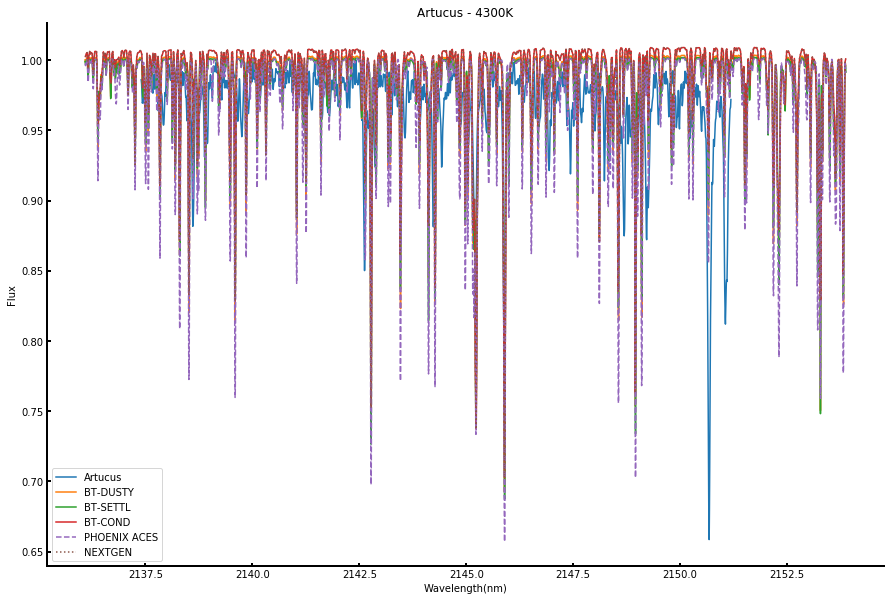

In [19]:
plt.figure(figsize=(15, 10))
artucus_2.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.legend()
plt.show()

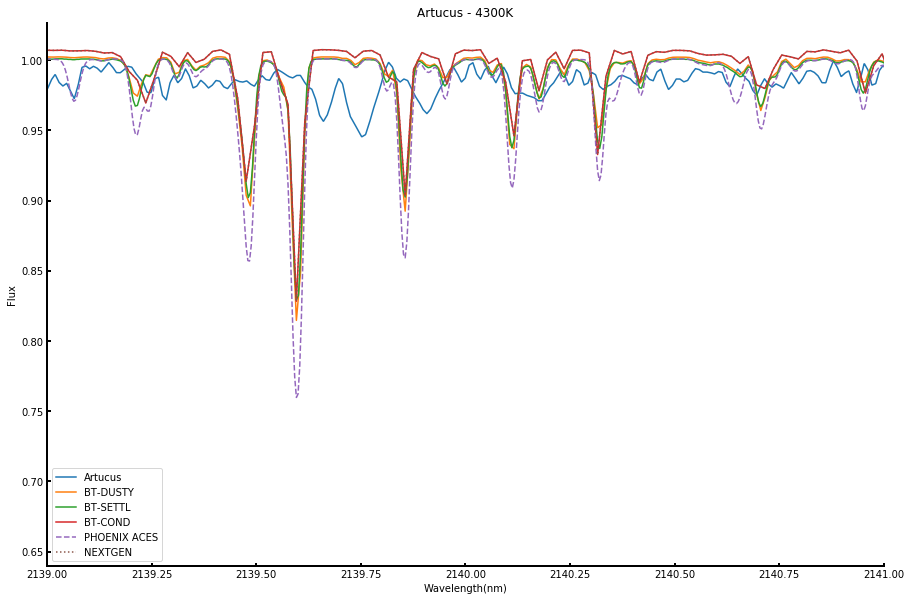

In [20]:
plt.figure(figsize=(15, 10))
artucus_2.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([2139, 2141])
plt.legend()
plt.show()

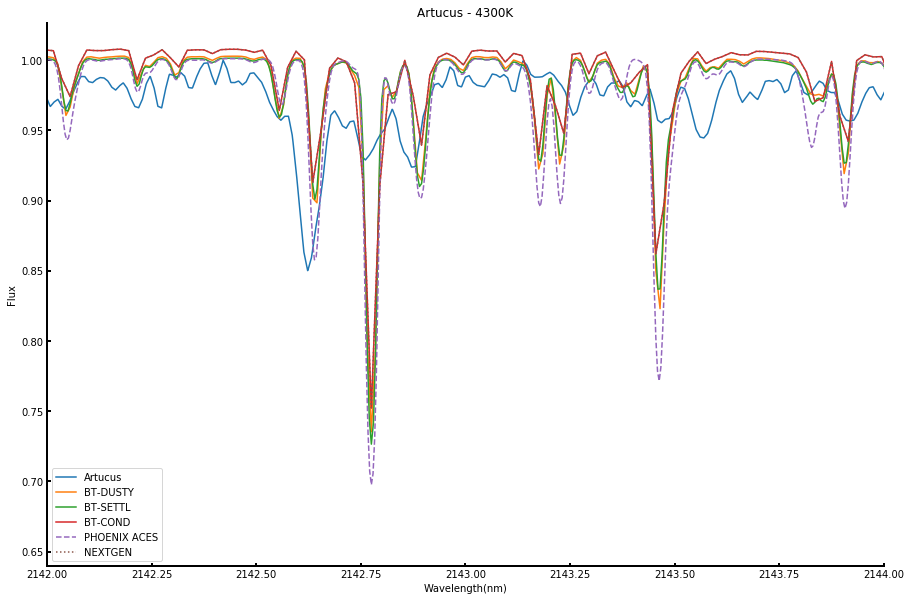

In [21]:
plt.figure(figsize=(15, 10))
artucus_2.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([2142, 2144])
plt.legend()
plt.show()

In [22]:
# Adjust resolution to R=100000
R = 100000
from convolve_spectrum import convolve_spectrum
old_spec = aces_spec.copy()

next_spec = convolve_spectrum(next_spec, chip_limits=[next_spec.xaxis[0], next_spec.xaxis[-1]], R=R, plot=False)
dusty_spec = convolve_spectrum(dusty_spec, chip_limits=[dusty_spec.xaxis[0], dusty_spec.xaxis[-1]], R=R, plot=False)
settl_spec = convolve_spectrum(settl_spec, chip_limits=[settl_spec.xaxis[0], settl_spec.xaxis[-1]], R=R, plot=False)
cond_spec = convolve_spectrum(cond_spec, chip_limits=[cond_spec.xaxis[0], cond_spec.xaxis[-1]], R=R, plot=False)
aces_spec = convolve_spectrum(aces_spec, chip_limits=[aces_spec.xaxis[0], aces_spec.xaxis[-1]], R=R, plot=False)

assert aces_spec != old_spec

100%|██████████| 4449/4449 [00:00<00:00, 30459.94it/s]


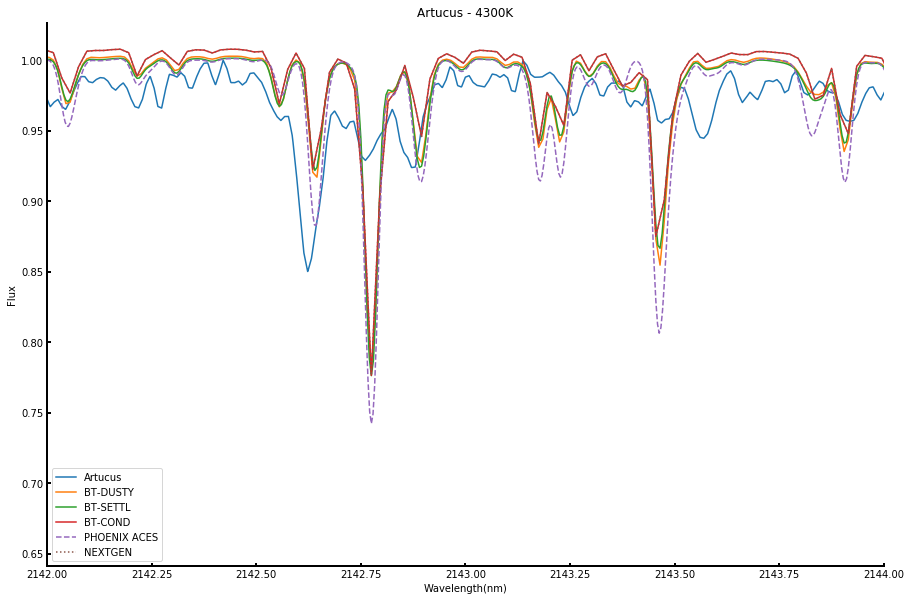

In [23]:
plt.figure(figsize=(15, 10))
artucus_2.plot(label="Artucus")
dusty_spec.plot(label="BT-DUSTY")
settl_spec.plot(label="BT-SETTL")
cond_spec.plot(label="BT-COND")
aces_spec.plot(linestyle="--", label="PHOENIX ACES")
next_spec.plot(linestyle=":", label="NEXTGEN")
#plt.plot(w_dusty_fits, f_dusty_fits/max(f_dusty_fits), label="Dusty fits")

plt.title("Artucus - 4300K")
plt.xlabel("Wavelength(nm)")
plt.ylabel("Flux")
plt.xlim([2142, 2144])
plt.legend()
plt.show()

In [24]:
# Test PyAstronomy loader function compared to mine.

from PyAstronomy.pyasl.phoenixUtils.read import readUnit7

%timeit load_Allard_Phoenix("data/lte043-2.5-0.0.BT-Dusty.spec.7")

%timeit readUnit7("data/lte043-2.5-0.0.BT-Dusty.spec.7")

# Only slightly faster. (But faster)

3 s ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.39 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
# Spectral Differences

